In [8]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *


# Load data
df = pd.read_csv('data/multi_lin_reg.csv')

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 20     │ │ int32       │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ age            │   0 │      0 │   39.65 │   10.03 │      23 │    31.5 │     40 │     47 │     58 │ ▆▇▆▇▇▃  │  │
│ │ experience     │   0 │      0 │     6.2 │   4.124 │       1 │    3.75 │      5 │      9 │     17 │ ▆▇▂▅▁▁  │  │
│ │ income         │   0 │      0 │   40740 │    8440 │   27840 │   35450 │  40190 │  45390 │  63600 │ ▅▇▇▅ ▁  │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes
None


age           [25, 30, 47, 32, 43, 51, 28, 33, 37, 39, 29, 5...
experience              [1, 3, 2, 5, 10, 7, 4, 8, 9, 12, 6, 17]
income        [30450, 35670, 31580, 40130, 47830, 41630, 413...
dtype: object

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >]], dtype=object)

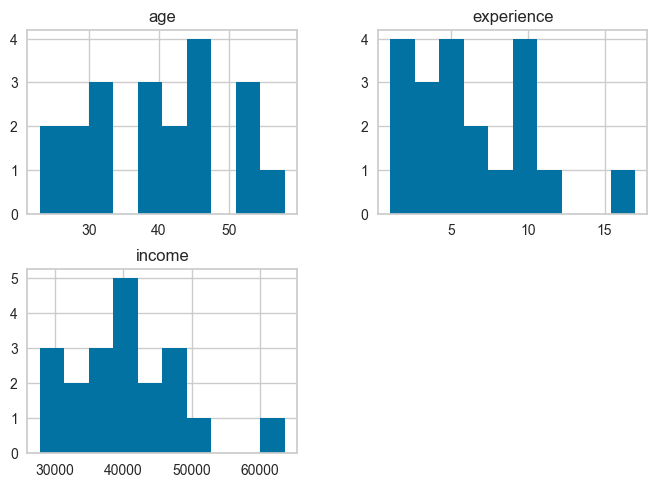

In [11]:
df.hist()

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

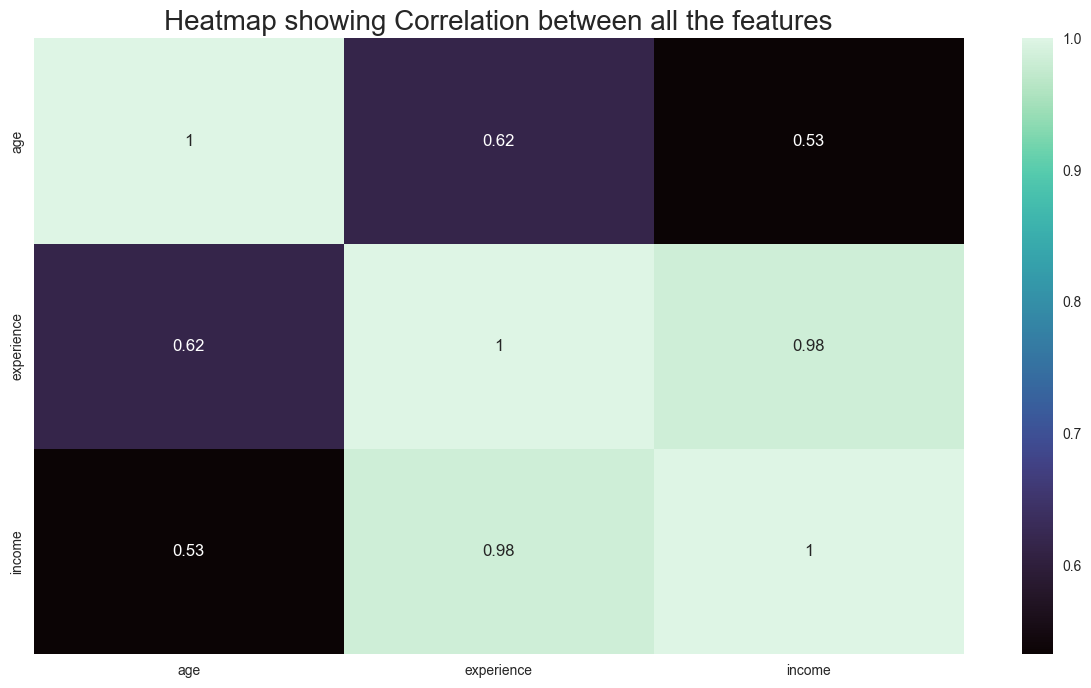

In [12]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [13]:
# Split data into training and testing sets
X =df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [15]:
l_reg=LinearRegression()
l_reg.fit(X,y)
l_reg_pre=l_reg.predict(X)
lr_mse = mean_squared_error(y, l_reg_pre)
lr_r2 = r2_score(y, l_reg_pre)
score_linear=l_reg.score(X,l_reg_pre)
print(lr_mse)
print(lr_r2)
print(score_linear)

1533633.9787141802
0.9773361310180797
1.0


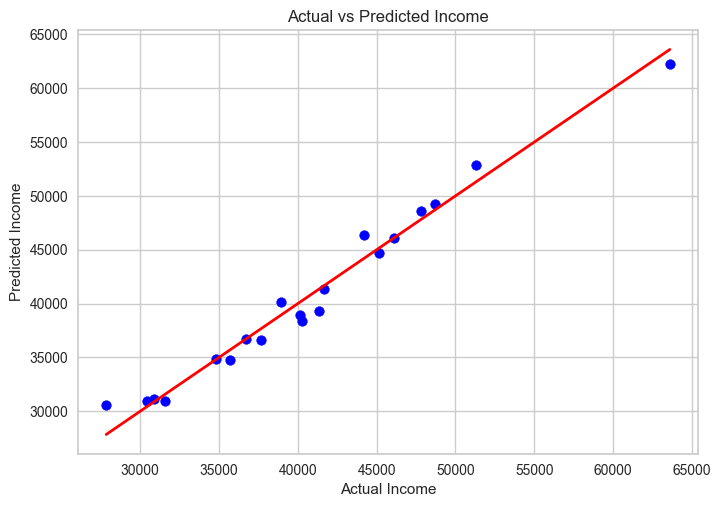

In [16]:
#Predict the values
y_pred = l_reg.predict(X)

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income')
plt.show()

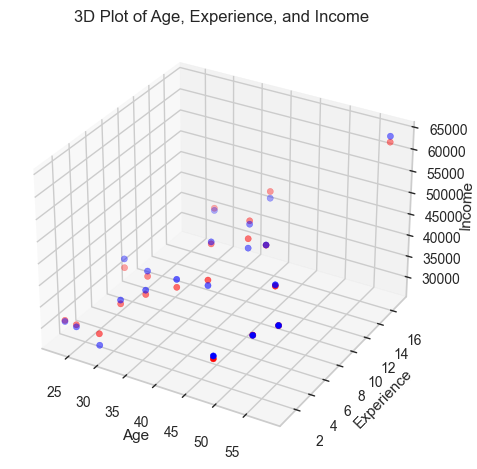

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['experience'], y, color='blue')
ax.scatter(df['age'], df['experience'], y_pred, color='red')

ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
plt.title('3D Plot of Age, Experience, and Income')
plt.show()


In [19]:
# your values
age = 41
experience = 16

# Print the predicted income
# Use your trained model to predict income
input_values = np.array([[age, experience]])
predicted_income = l_reg.predict(input_values)
print("Predicted income>>", predicted_income)

Predicted income>> [140069.40872438]
